In [167]:
import pandas as pd
import numpy as np

In [168]:
df = pd.read_csv('germany-used-cars-dataset-2023/used_cars_dataset.csv')

In [169]:
df.head()

Unnamed: 0       brand              model  color registration_date  year  \
0           0  alfa-romeo     Alfa Romeo GTV    red           10/1995  1995   
1           1  alfa-romeo     Alfa Romeo 164  black           02/1995  1995   
2           2  alfa-romeo  Alfa Romeo Spider  black           02/1995  1995   
3           3  alfa-romeo  Alfa Romeo Spider  black           07/1995  1995   
4           4  alfa-romeo     Alfa Romeo 164    red           11/1996  1996   

  price_in_euro power_kw power_ps transmission_type fuel_type  \
0          1300      148      201            Manual    Petrol   
1         24900      191      260            Manual    Petrol   
2          5900      110      150           Unknown    Petrol   
3          4900      110      150            Manual    Petrol   
4         17950      132      179            Manual    Petrol   

  fuel_consumption_l_100km fuel_consumption_g_km  mileage_in_km  \
0            10,9 l/100 km              260 g/km       160500.0   
1                      NaN              - (g/km)       190000.0   
2                      NaN              - (g/km)       129000.0   
3             9,5 l/100 km              225 g/km       189500.0   
4             7,2 l/100 km              - (g/km)        96127.0   

                       offer_description  
0                              2.0 V6 TB  
1                    Q4 Allrad, 3.2L GTA  
2                          ALFA ROME 916  
3                   2.0 16V Twin Spark L  
4  3.0i Super V6, absoluter Topzustand !

In [170]:
#Column 1 appears to be a duplicate of the index, we can therefore drop it

df = df.drop(df.columns[0], axis=1)


In [171]:
df.head()

brand              model  color registration_date  year price_in_euro  \
0  alfa-romeo     Alfa Romeo GTV    red           10/1995  1995          1300   
1  alfa-romeo     Alfa Romeo 164  black           02/1995  1995         24900   
2  alfa-romeo  Alfa Romeo Spider  black           02/1995  1995          5900   
3  alfa-romeo  Alfa Romeo Spider  black           07/1995  1995          4900   
4  alfa-romeo     Alfa Romeo 164    red           11/1996  1996         17950   

  power_kw power_ps transmission_type fuel_type fuel_consumption_l_100km  \
0      148      201            Manual    Petrol            10,9 l/100 km   
1      191      260            Manual    Petrol                      NaN   
2      110      150           Unknown    Petrol                      NaN   
3      110      150            Manual    Petrol             9,5 l/100 km   
4      132      179            Manual    Petrol             7,2 l/100 km   

  fuel_consumption_g_km  mileage_in_km                      offer_description  
0              260 g/km       160500.0                              2.0 V6 TB  
1              - (g/km)       190000.0                    Q4 Allrad, 3.2L GTA  
2              - (g/km)       129000.0                          ALFA ROME 916  
3              225 g/km       189500.0                   2.0 16V Twin Spark L  
4              - (g/km)        96127.0  3.0i Super V6, absoluter Topzustand !

In [172]:
#"power_kw" is unnecessary since only "power_ps" will be used. Also the column "offer_description" does not contain necessary information and is therefore dropped.
#Also, registration date will not be necessary, year will suffice

df = df.drop(columns=['power_kw','offer_description', 'registration_date'])





In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     251079 non-null  object 
 1   model                     251079 non-null  object 
 2   color                     250913 non-null  object 
 3   year                      251079 non-null  object 
 4   price_in_euro             251079 non-null  object 
 5   power_ps                  250950 non-null  object 
 6   transmission_type         251079 non-null  object 
 7   fuel_type                 251079 non-null  object 
 8   fuel_consumption_l_100km  224206 non-null  object 
 9   fuel_consumption_g_km     251079 non-null  object 
 10  mileage_in_km             250927 non-null  float64
dtypes: float64(1), object(10)
memory usage: 21.1+ MB


In [174]:
#price_in_euro is currently an object, turn into integer. Same goes for power_ps
df[['price_in_euro', 'power_ps']] = df[['price_in_euro', 'power_ps']].apply(pd.to_numeric, errors='coerce')
df.dropna(subset=['price_in_euro', 'power_ps'], inplace=True)




In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250752 entries, 0 to 251078
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     250752 non-null  object 
 1   model                     250752 non-null  object 
 2   color                     250586 non-null  object 
 3   year                      250752 non-null  object 
 4   price_in_euro             250752 non-null  float64
 5   power_ps                  250752 non-null  float64
 6   transmission_type         250752 non-null  object 
 7   fuel_type                 250752 non-null  object 
 8   fuel_consumption_l_100km  223931 non-null  object 
 9   fuel_consumption_g_km     250752 non-null  object 
 10  mileage_in_km             250692 non-null  float64
dtypes: float64(3), object(8)
memory usage: 23.0+ MB


In [176]:
df['transmission_type'].value_counts()

transmission_type
Automatic         131563
Manual            117731
Unknown             1141
Semi-automatic       317
Name: count, dtype: int64

In [177]:
#turn unknown transmission types to NaNs in order to later on drop them

df['transmission_type'] = df['transmission_type'].replace('Unknown', np.nan)


In [178]:
print('Unique Values in the column year:')
print(df['year'].unique(), '\n')

Unique Values in the column year:
['1995' '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004'
 '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023'] 



In [179]:
print('Unique Values in the column fuel_type:')
print(df['fuel_type'].unique(), '\n')
df['fuel_type'].value_counts()

Unique Values in the column fuel_type:
['Petrol' 'Diesel' 'Hybrid' 'LPG' 'Other' 'CNG' 'Diesel Hybrid' 'Electric'
 'Unknown' 'Ethanol' 'Hydrogen'] 



fuel_type
Petrol           143231
Diesel            86396
Hybrid            12580
Electric           5955
LPG                1255
CNG                 508
Diesel Hybrid       476
Other               173
Unknown              88
Hydrogen             80
Ethanol              10
Name: count, dtype: int64

In [180]:
#We can turn the "Unknown" and "Other" fuel types to NaNs to drop them with our final step in Data Cleaning.

df['fuel_type'] = df['fuel_type'].replace(['Unknown', 'Other'], np.nan)

In [181]:
print('Unique Values in the column fuel_consumption:')
df['fuel_consumption_l_100km'].value_counts()

Unique Values in the column fuel_consumption:


fuel_consumption_l_100km
4,9 l/100 km       8157
5,1 l/100 km       7654
5,5 l/100 km       7613
5,9 l/100 km       7514
5,3 l/100 km       7434
                   ... 
594 km (Ort)          1
464 km (Ort)          1
687 km (Ort)          1
12,6 kWh/100 km       1
93 km (Ort)           1
Name: count, Length: 531, dtype: int64

In [182]:
#Unusually high amount of NaNs in fuel_consumption. Probably caused by electric cars.

nan_count = df['fuel_consumption_l_100km'].isna().sum()
print("Number of NaN values in 'fuel_consumption_l_100km' column:", nan_count)
print("This is about", round(nan_count / len(df['fuel_consumption_l_100km'])*100,2) , "% of total lines in that column")


Number of NaN values in 'fuel_consumption_l_100km' column: 26821
This is about 10.7 % of total lines in that column


In [183]:
#Trying to put all fuel consumption values into integers while also removing nonsensical data

df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].str.extract('([\d,\.]+) l/100 km')
#df['fuel_consumption_l_100km'] = pd.to_numeric(df['fuel_consumption_l_100km'], errors='coerce')

print(df)

# First version, this only extracted the numbers without filtering so also nonsensical values like 687 were left 
#df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].str.extract('([\d,\.]+)')
#df['fuel_consumption_l_100km'] = pd.to_numeric(df['fuel_consumption_l_100km'], errors='coerce')


             brand              model  color  year  price_in_euro  power_ps  \
0       alfa-romeo     Alfa Romeo GTV    red  1995         1300.0     201.0   
1       alfa-romeo     Alfa Romeo 164  black  1995        24900.0     260.0   
2       alfa-romeo  Alfa Romeo Spider  black  1995         5900.0     150.0   
3       alfa-romeo  Alfa Romeo Spider  black  1995         4900.0     150.0   
4       alfa-romeo     Alfa Romeo 164    red  1996        17950.0     179.0   
...            ...                ...    ...   ...            ...       ...   
251074       volvo         Volvo XC40  white  2023        57990.0     261.0   
251075       volvo         Volvo XC90  white  2023        89690.0     235.0   
251076       volvo          Volvo V60  white  2023        61521.0     197.0   
251077       volvo         Volvo XC40  white  2023        57890.0     179.0   
251078       volvo         Volvo XC40   gold  2023        52900.0     218.0   

       transmission_type fuel_type fuel_consumption

In [184]:
print('Unique Values in the column fuel_consumption:')
df['fuel_consumption_l_100km'].value_counts()

Unique Values in the column fuel_consumption:


fuel_consumption_l_100km
4,9     8157
5,1     7654
5,5     7613
5,9     7514
5,3     7434
        ... 
53         1
52         1
31,4       1
152        1
22,6       1
Name: count, Length: 254, dtype: int64

In [185]:
nan_count = df['fuel_consumption_l_100km'].isna().sum()
print(nan_count)

28964


In [186]:
print(df['fuel_consumption_l_100km'].unique(), '\n')

['10,9' nan '9,5' '7,2' '8,8' '13,4' '11' '9,2' '11,1' '11,7' '8,4' '8,2'
 '8,9' '11,4' '8,5' '8,3' '7,9' '8,7' '8,1' '12,2' '12' '5,8' '10' '6,7'
 '8,6' '12,5' '9,7' '12,1' '8' '7,5' '6,2' '13,2' '6' '12,4' '6,8' '9,4'
 '6,1' '5,9' '11,5' '11,6' '7,6' '5,2' '7,1' '6,9' '12,3' '6,5' '7,7'
 '4,6' '4,8' '4,5' '5,3' '6,4' '4,9' '6,6' '5,5' '5,4' '5,6' '16,8' '5,7'
 '3,5' '4,4' '4,7' '4' '4,2' '7' '4,3' '5,1' '3,4' '3,9' '3,8' '9' '9,8'
 '10,3' '7,4' '7,8' '6,3' '10,1' '5' '9,3' '7,3' '10,8' '0' '11,8' '1,3'
 '1,4' '9,1' '9,6' '10,2' '1,5' '12,7' '16,5' '14,7' '16,7' '18,8' '14,6'
 '17,8' '17,2' '18,9' '15' '13,8' '18,7' '16,4' '15,6' '18,2' '18' '14'
 '14,9' '13,9' '15,5' '12,6' '14,4' '12,9' '14,3' '17' '12,8' '13,1' '9,9'
 '10,5' '14,2' '13,5' '10,6' '16,9' '11,2' '10,7' '11,3' '19,9' '10,4'
 '13,7' '11,9' '3,2' '14,5' '14,8' '13,3' '13' '13,6' '4,1' '3,7' '3,3'
 '1,7' '1,9' '3,6' '1,8' '1,6' '1' '2,1' '2,2' '2,4' '2' '3' '21,2' '2,7'
 '2,6' '19,4' '0,4' '19,2' '20,6' '16,6' '17,1' '19,

In [187]:
#turning values into float

df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].str.replace(',', '.').astype(float)

In [188]:
#check for outliers

print(df['fuel_consumption_l_100km'].nlargest(70))

183867    173.0
203327    171.0
133390    152.0
183844    147.0
239041    146.0
          ...  
44462      38.0
232140     36.0
93883      31.4
214378     30.0
217466     26.0
Name: fuel_consumption_l_100km, Length: 70, dtype: float64


In [189]:
nan_count = df['fuel_consumption_l_100km'].isna().sum()
print(nan_count)

28964


In [190]:
#the outliers are not that bad but we can at least drop everything over 50l/100km because that is definitely wrong data

nan_count_before = df['fuel_consumption_l_100km'].isna().sum()

df.loc[df['fuel_consumption_l_100km'] > 50, 'fuel_consumption_l_100km'] = np.nan

nan_count_after = df['fuel_consumption_l_100km'].isna().sum()

print("This operation has lead to", nan_count_after - nan_count_before, "more NaN values. Total now:", nan_count_after)


This operation has lead to 60 more NaN values. Total now: 29024


In [191]:
#Now NaN can also stem from Electric cars. We do not want to remove all of those from the dataset. 
#So we fill all electric cars with missing fuel consumption values with the value 0.

df.loc[(df['fuel_consumption_l_100km'].isna()) & (df['fuel_type'] == 'Electric'), 'fuel_consumption_l_100km'] = 0
nan_count_after = df['fuel_consumption_l_100km'].isna().sum()
print(nan_count_after)

23069


In [192]:
nan_count = df['fuel_consumption_g_km'].isna().sum()
print(nan_count)

0


In [193]:
print('Unique Values in the column fuel_consumption g km:')
df['fuel_consumption_g_km'].value_counts()

Unique Values in the column fuel_consumption g km:


fuel_consumption_g_km
- (g/km)             35778
0 g/km                8514
119 g/km              4812
114 g/km              3879
139 g/km              3389
                     ...  
542 km Reichweite        1
124,7 g/km               1
225,4 g/km               1
104,5 g/km               1
77 km Reichweite         1
Name: count, Length: 1435, dtype: int64

In [194]:
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].str.extract('([\d,\.]+) g/km')

In [195]:
nan_count = df['fuel_consumption_g_km'].isna().sum()
print(nan_count)

41002


In [196]:
#We are dropping this column since we are not planning on using it and if really needed the g/km values can be calculated
# from the l/100km values 

df = df.drop(columns=['fuel_consumption_g_km'])

In [197]:
#final overview before dropping NaNs

for i in df.columns:
    print('{} column has {} missing values. Data type is {}'.format(i, df[i].isna().sum(), df[i].dtype))
print('')

brand column has 0 missing values. Data type is object
model column has 0 missing values. Data type is object
color column has 166 missing values. Data type is object
year column has 0 missing values. Data type is object
price_in_euro column has 0 missing values. Data type is float64
power_ps column has 0 missing values. Data type is float64
transmission_type column has 1141 missing values. Data type is object
fuel_type column has 261 missing values. Data type is object
fuel_consumption_l_100km column has 23069 missing values. Data type is float64
mileage_in_km column has 60 missing values. Data type is float64



In [198]:
df=df.dropna()

In [199]:
#final overview before exporting cleaned dataset

for i in df.columns:
    print('{} column has {} missing values. Data type is {}'.format(i, df[i].isna().sum(), df[i].dtype))
print('')

brand column has 0 missing values. Data type is object
model column has 0 missing values. Data type is object
color column has 0 missing values. Data type is object
year column has 0 missing values. Data type is object
price_in_euro column has 0 missing values. Data type is float64
power_ps column has 0 missing values. Data type is float64
transmission_type column has 0 missing values. Data type is object
fuel_type column has 0 missing values. Data type is object
fuel_consumption_l_100km column has 0 missing values. Data type is float64
mileage_in_km column has 0 missing values. Data type is float64



In [200]:
df.head()

brand              model  color  year  price_in_euro  power_ps  \
0  alfa-romeo     Alfa Romeo GTV    red  1995         1300.0     201.0   
3  alfa-romeo  Alfa Romeo Spider  black  1995         4900.0     150.0   
4  alfa-romeo     Alfa Romeo 164    red  1996        17950.0     179.0   
5  alfa-romeo  Alfa Romeo Spider    red  1996         7900.0     150.0   
6  alfa-romeo     Alfa Romeo 145    red  1996         3500.0     150.0   

  transmission_type fuel_type  fuel_consumption_l_100km  mileage_in_km  
0            Manual    Petrol                      10.9       160500.0  
3            Manual    Petrol                       9.5       189500.0  
4            Manual    Petrol                       7.2        96127.0  
5            Manual    Petrol                       9.5        47307.0  
6            Manual    Petrol                       8.8       230000.0

In [201]:
#this shows we still have a very good amount of data left to work with
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226536 entries, 0 to 251078
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     226536 non-null  object 
 1   model                     226536 non-null  object 
 2   color                     226536 non-null  object 
 3   year                      226536 non-null  object 
 4   price_in_euro             226536 non-null  float64
 5   power_ps                  226536 non-null  float64
 6   transmission_type         226536 non-null  object 
 7   fuel_type                 226536 non-null  object 
 8   fuel_consumption_l_100km  226536 non-null  float64
 9   mileage_in_km             226536 non-null  float64
dtypes: float64(4), object(6)
memory usage: 19.0+ MB


In [202]:
#export 
df.to_csv('germany-used-cars-dataset-2023/cleaned_used_cars_dataset.csv')

In [203]:
#import cleaned data
df2 = pd.read_csv('germany-used-cars-dataset-2023/cleaned_used_cars_dataset.csv')

In [204]:
#more libraries for EDA use
import seaborn as sns
import matplotlib.pyplot as plt

In [205]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226536 entries, 0 to 226535
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                226536 non-null  int64  
 1   brand                     226536 non-null  object 
 2   model                     226536 non-null  object 
 3   color                     226536 non-null  object 
 4   year                      226536 non-null  int64  
 5   price_in_euro             226536 non-null  float64
 6   power_ps                  226536 non-null  float64
 7   transmission_type         226536 non-null  object 
 8   fuel_type                 226536 non-null  object 
 9   fuel_consumption_l_100km  226536 non-null  float64
 10  mileage_in_km             226536 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 19.0+ MB


In [206]:
df2.head()

Unnamed: 0       brand              model  color  year  price_in_euro  \
0           0  alfa-romeo     Alfa Romeo GTV    red  1995         1300.0   
1           3  alfa-romeo  Alfa Romeo Spider  black  1995         4900.0   
2           4  alfa-romeo     Alfa Romeo 164    red  1996        17950.0   
3           5  alfa-romeo  Alfa Romeo Spider    red  1996         7900.0   
4           6  alfa-romeo     Alfa Romeo 145    red  1996         3500.0   

   power_ps transmission_type fuel_type  fuel_consumption_l_100km  \
0     201.0            Manual    Petrol                      10.9   
1     150.0            Manual    Petrol                       9.5   
2     179.0            Manual    Petrol                       7.2   
3     150.0            Manual    Petrol                       9.5   
4     150.0            Manual    Petrol                       8.8   

   mileage_in_km  
0       160500.0  
1       189500.0  
2        96127.0  
3        47307.0  
4       230000.0

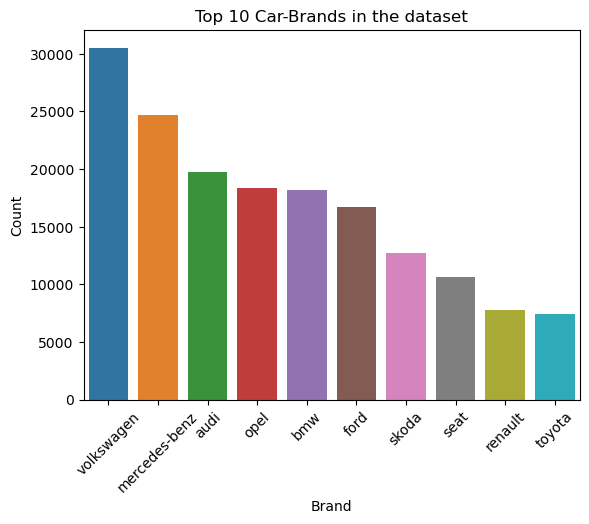

In [207]:
brands_count = df2['brand'].value_counts().head(10)
ax = sns.barplot(x=brands_count.index, y=brands_count.values, ax=None)
ax.set(xlabel='Brand', ylabel='Count', title='Top 10 Car-Brands in the dataset')
plt.xticks(rotation=45) 
plt.show()

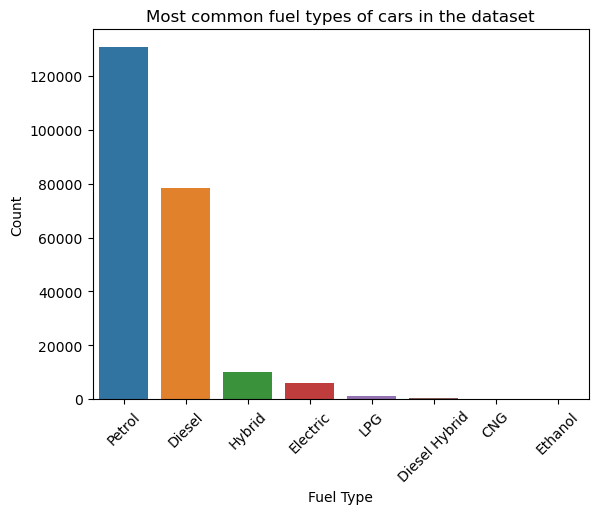

In [208]:
fuel_types = df2['fuel_type'].value_counts().head(10)
ax = sns.barplot(x=fuel_types.index, y=fuel_types.values, ax=None)
ax.set(xlabel='Fuel Type', ylabel='Count', title='Most common fuel types of cars in the dataset')
plt.xticks(rotation=45) 

plt.show()

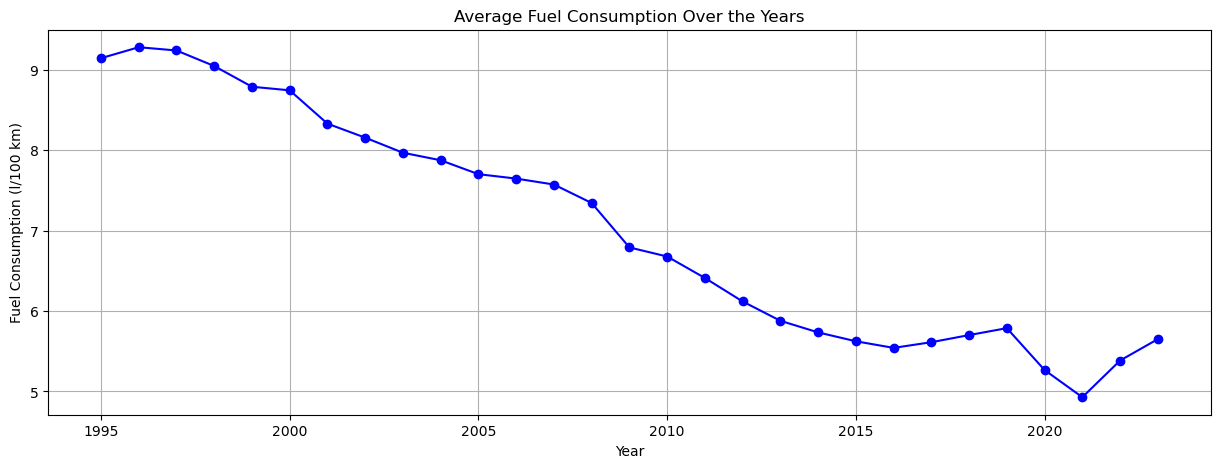

In [209]:
avg_fuel_consumption = df2.groupby('year')['fuel_consumption_l_100km'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.plot(avg_fuel_consumption['year'], avg_fuel_consumption['fuel_consumption_l_100km'], marker='o', linestyle='-', color='b')

# Set labels and title

plt.xlabel('Year')
plt.ylabel('Fuel Consumption (l/100 km)')
plt.title('Average Fuel Consumption Over the Years')

# Display the line chart
plt.grid(True)

plt.show()

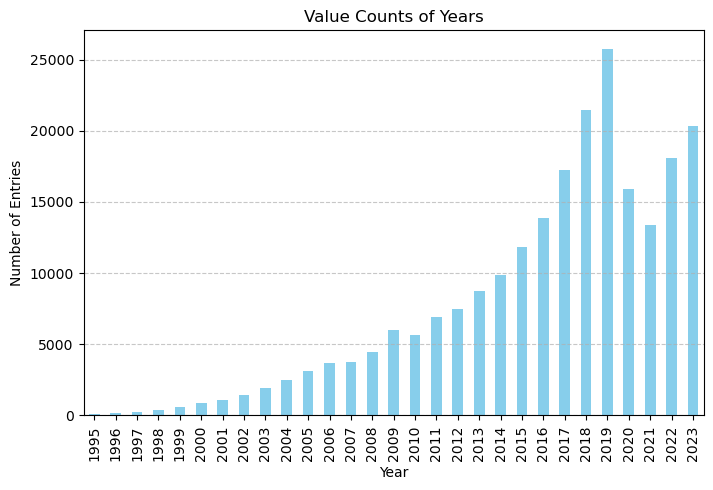

In [210]:
# Count the number of entries for each year
year_value_counts = df2['year'].value_counts().sort_index()

# Create a bar plot for the value counts of each year
plt.figure(figsize=(8, 5))
year_value_counts.plot(kind='bar', color='skyblue')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.title('Value Counts of Years')

# Display the bar plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [211]:
# Total electric cars
electric_count = df2['fuel_type'].value_counts().get('Electric', 0)

print(f"Number of entries for fuel type 'Electric': {electric_count}")

Number of entries for fuel type 'Electric': 5859


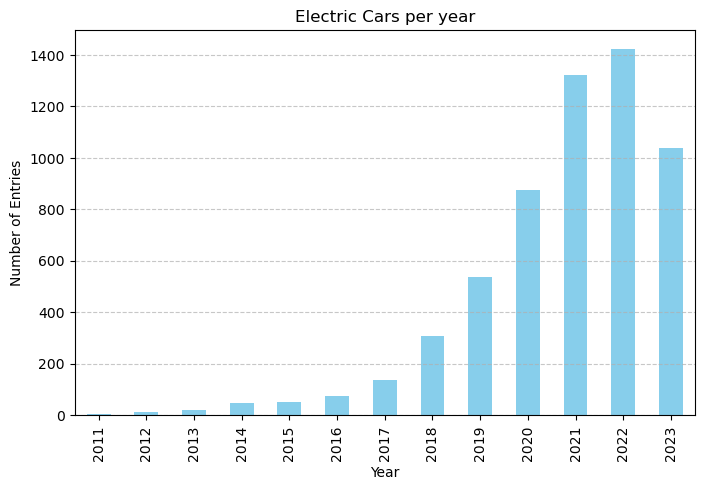

In [212]:
#count electric cars in the dataset
electric_df2 = df2[df2['fuel_type'] == 'Electric']
year_counts_electric = electric_df2['year'].value_counts().sort_index()


# Create a bar plot for the value counts of each year
plt.figure(figsize=(8, 5))
year_counts_electric.plot(kind='bar', color='skyblue')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.title('Electric Cars per year')

# Display the bar plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [213]:
year_counts = electric_df2['year'].value_counts()
print(year_counts)

year
2022    1425
2021    1323
2023    1037
2020     877
2019     538
2018     309
2017     135
2016      75
2015      53
2014      48
2013      22
2012      13
2011       4
Name: count, dtype: int64


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'price_in_euro'}>,
        <Axes: title={'center': 'power_ps'}>],
       [<Axes: title={'center': 'fuel_consumption_l_100km'}>,
        <Axes: title={'center': 'mileage_in_km'}>]], dtype=object)

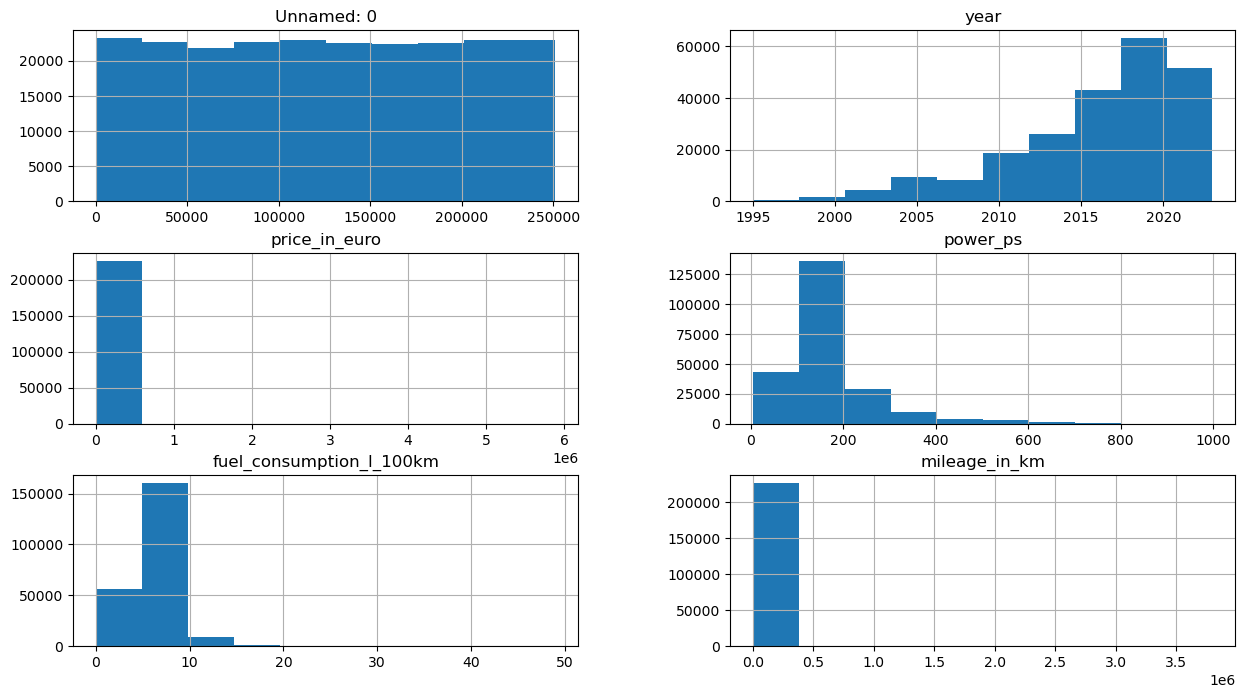

In [214]:
df2.hist(figsize=(15,8) )

In [215]:
zero_mileage_count = (df2['mileage_in_km'] == 0).sum()

print(f"Number of values with 0 mileage in 'mileage_in_km': {zero_mileage_count}")


Number of values with 0 mileage in 'mileage_in_km': 199


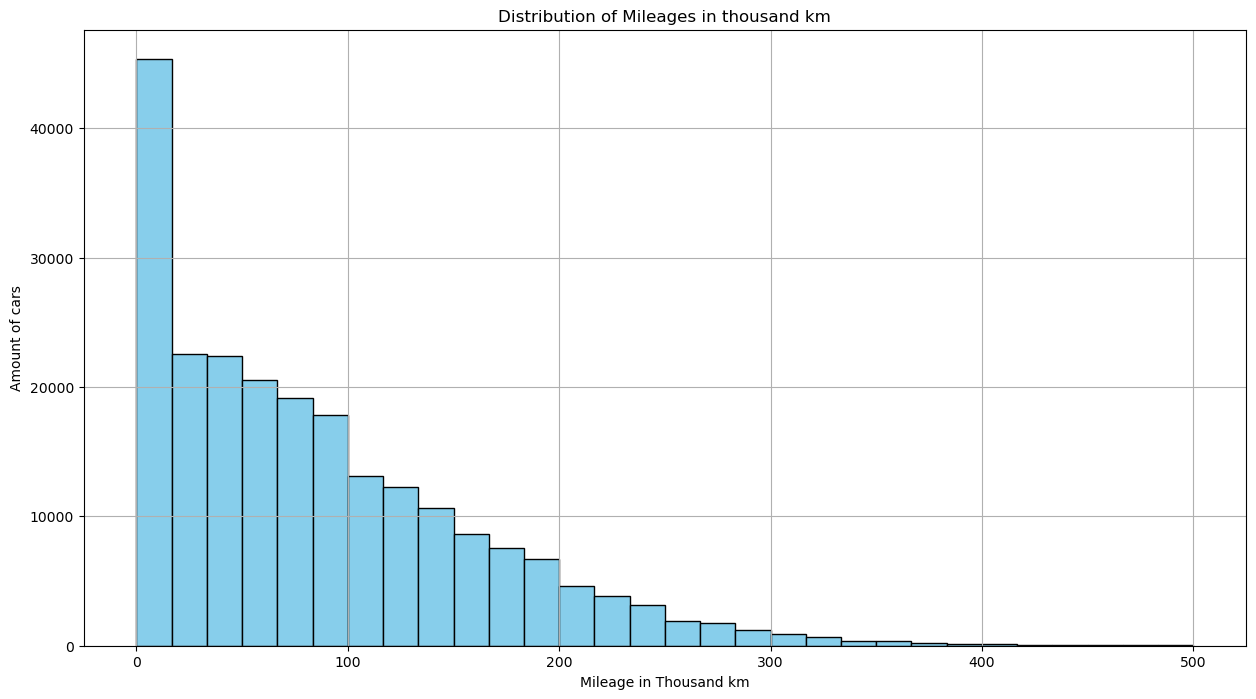

In [216]:
plt.figure(figsize=(15, 8))


# Specify the desired range for the x-axis for better visualization
mileage_range = (0, 500)

# Convert prices to thousand euros for better visualization
df2['mileage_in_km_thousand'] = df2['mileage_in_km'] / 1000

df2['mileage_in_km_thousand'].hist(figsize=(15, 8), bins=30, range=mileage_range, edgecolor='black', color='skyblue')

plt.title('Distribution of Mileages in thousand km')
plt.xlabel('Mileage in Thousand km')
plt.ylabel('Amount of cars')

plt.show()

In [217]:
print(df2['mileage_in_km'].nlargest(70))

56490     3800000.0
52183     2830000.0
52363     2580000.0
124985    2390000.0
5586      2230456.0
            ...    
94342      558100.0
102571     555028.0
104019     552000.0
53351      551421.0
197316     550000.0
Name: mileage_in_km, Length: 70, dtype: float64


In [218]:
selected_columns = ['mileage_in_km', 'brand', 'model','year']

top_5_rows = df2.nlargest(5, 'mileage_in_km')[selected_columns]
print(top_5_rows)

        mileage_in_km brand         model  year
56490       3800000.0  ford  Ford Transit  2014
52183       2830000.0  ford   Ford Galaxy  2003
52363       2580000.0  ford   Ford Fiesta  2004
124985      2390000.0  opel    Opel Corsa  2003
5586        2230456.0  audi       Audi Q7  2011


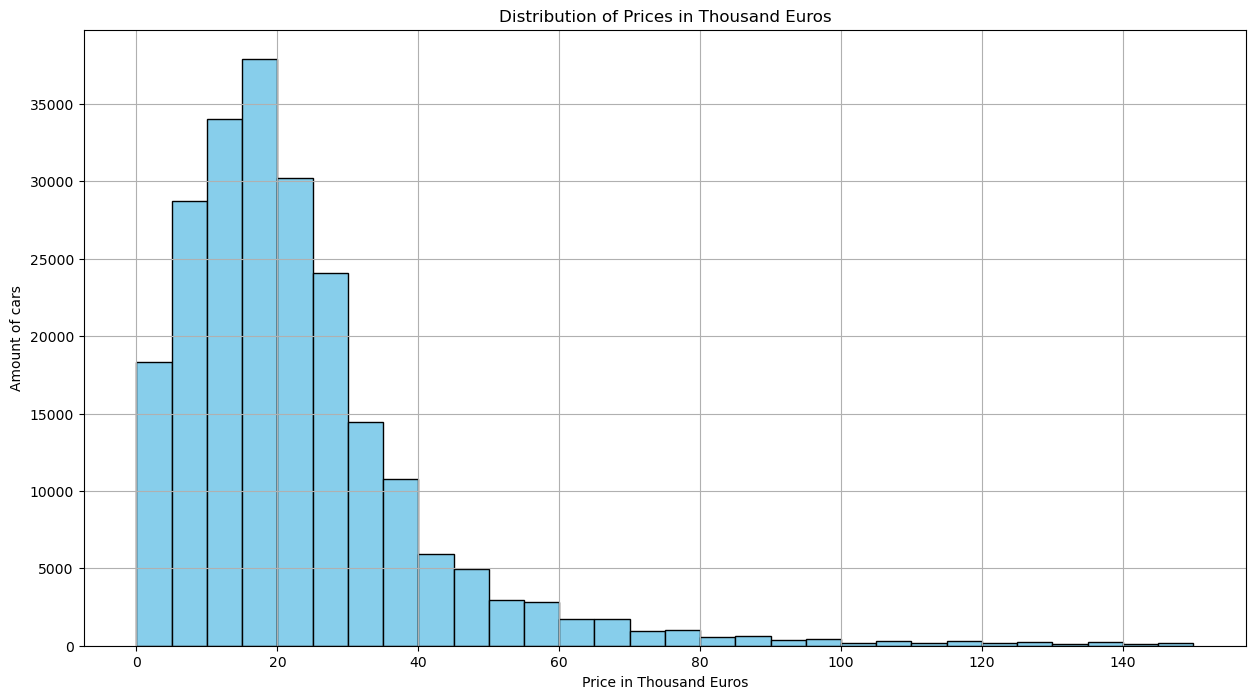

In [219]:
plt.figure(figsize=(15, 8))


# Specify the desired range for the x-axis for better visualization
price_range = (0, 150)

# Convert prices to thousand euros for better visualization
df2['price_in_euro_thousand'] = df2['price_in_euro'] / 1000

df2['price_in_euro_thousand'].hist(figsize=(15, 8), bins=30, range=price_range, edgecolor='black', color='skyblue')

plt.title('Distribution of Prices in Thousand Euros')
plt.xlabel('Price in Thousand Euros')
plt.ylabel('Amount of cars')

plt.show()

In [220]:
print(df2['price_in_euro'].nlargest(70))

84224     5890500.0
84327     3250000.0
95746     2490000.0
148971    1990000.0
149282    1350000.0
            ...    
84315      599800.0
47416      589890.0
47417      589890.0
47488      575900.0
84204      575900.0
Name: price_in_euro, Length: 70, dtype: float64


In [221]:
selected_columns2 = ['price_in_euro', 'brand', 'model', 'power_ps', 'year', 'color']

top_5_rows2 = df2.nlargest(5, 'price_in_euro')[selected_columns2]
print(top_5_rows2)

        price_in_euro          brand              model  power_ps  year  color
84224       5890500.0    lamborghini        Lamborghini     770.0  2018   grey
84327       3250000.0    lamborghini        Lamborghini     818.0  2021  black
95746       2490000.0  mercedes-benz  Mercedes-Benz SLR     650.0  2007   grey
148971      1990000.0        porsche        Porsche 918     886.0  2014  white
149282      1350000.0        porsche        Porsche 991     430.0  2015  white


In [222]:
#dropping the thousand categories again
df2 = df2.drop(columns=['price_in_euro_thousand','mileage_in_km_thousand'])

In [223]:
### One-hot encoding all remaining categories into binaries (booleans) with the integrated pandas function get_dummies

In [224]:
df2.head()

Unnamed: 0       brand              model  color  year  price_in_euro  \
0           0  alfa-romeo     Alfa Romeo GTV    red  1995         1300.0   
1           3  alfa-romeo  Alfa Romeo Spider  black  1995         4900.0   
2           4  alfa-romeo     Alfa Romeo 164    red  1996        17950.0   
3           5  alfa-romeo  Alfa Romeo Spider    red  1996         7900.0   
4           6  alfa-romeo     Alfa Romeo 145    red  1996         3500.0   

   power_ps transmission_type fuel_type  fuel_consumption_l_100km  \
0     201.0            Manual    Petrol                      10.9   
1     150.0            Manual    Petrol                       9.5   
2     179.0            Manual    Petrol                       7.2   
3     150.0            Manual    Petrol                       9.5   
4     150.0            Manual    Petrol                       8.8   

   mileage_in_km  
0       160500.0  
1       189500.0  
2        96127.0  
3        47307.0  
4       230000.0

In [225]:
df2 = df2.drop(columns=['Unnamed: 0'])

In [226]:
df2.model.value_counts()

model
Volkswagen Golf          7030
Opel Astra               3995
Opel Corsa               3932
SEAT Leon                3630
Ford Focus               3481
                         ... 
Hyundai Genesis Coupe       1
Hyundai iX55                1
Nissan Townstar EV          1
Hyundai Coupe               1
Lancia ZETA                 1
Name: count, Length: 1247, dtype: int64

In [227]:
#Before we go into Pre-Processing the training data, Car Model column will be dropped since there are too many different models 
df2 = df2.drop(columns=['model'])

In [228]:
df2.brand.value_counts()

brand
volkswagen       30544
mercedes-benz    24651
audi             19735
opel             18368
bmw              18147
ford             16667
skoda            12744
seat             10669
renault           7769
toyota            7388
hyundai           6219
peugeot           5244
kia               5231
fiat              4538
mazda             3975
mini              3865
volvo             3668
porsche           3598
citroen           3542
nissan            3463
dacia             3094
land-rover        2733
jeep              1575
smart             1525
alfa-romeo        1325
jaguar            1291
mitsubishi         726
honda              687
maserati           575
bentley            395
ferrari            318
ssangyong          299
lamborghini        272
dodge              266
aston-martin       219
saab               198
daihatsu           179
lada               162
isuzu              156
cadillac           118
chevrolet          112
lancia              96
infiniti            86
daewo

In [229]:
df2 = df2.join(pd.get_dummies(df2.brand))
df2 = df2.drop("brand", axis=1)

In [230]:
df2.head()

color  year  price_in_euro  power_ps transmission_type fuel_type  \
0    red  1995         1300.0     201.0            Manual    Petrol   
1  black  1995         4900.0     150.0            Manual    Petrol   
2    red  1996        17950.0     179.0            Manual    Petrol   
3    red  1996         7900.0     150.0            Manual    Petrol   
4    red  1996         3500.0     150.0            Manual    Petrol   

   fuel_consumption_l_100km  mileage_in_km  alfa-romeo  aston-martin  ...  \
0                      10.9       160500.0        True         False  ...   
1                       9.5       189500.0        True         False  ...   
2                       7.2        96127.0        True         False  ...   
3                       9.5        47307.0        True         False  ...   
4                       8.8       230000.0        True         False  ...   

   renault  rover   saab   seat  skoda  smart  ssangyong  toyota  volkswagen  \
0    False  False  False  False  False  False      False   False       False   
1    False  False  False  False  False  False      False   False       False   
2    False  False  False  False  False  False      False   False       False   
3    False  False  False  False  False  False      False   False       False   
4    False  False  False  False  False  False      False   False       False   

   volvo  
0  False  
1  False  
2  False  
3  False  
4  False  

[5 rows x 55 columns]

In [231]:
df2.color.value_counts()

color
black     53478
grey      42416
white     36173
silver    31200
blue      28866
red       19096
brown      4016
green      3088
orange     3019
beige      2194
yellow     1551
bronze      535
gold        534
violet      370
Name: count, dtype: int64

In [232]:
df2 = df2.join(pd.get_dummies(df2.color))
df2 = df2.drop("color", axis=1)

In [233]:
df2.fuel_type.value_counts()

fuel_type
Petrol           130775
Diesel            78568
Hybrid             9904
Electric           5859
LPG                1028
Diesel Hybrid       371
CNG                  26
Ethanol               5
Name: count, dtype: int64

In [234]:
df2 = df2.join(pd.get_dummies(df2.fuel_type))
df2 = df2.drop("fuel_type", axis=1)

In [235]:
df2.transmission_type.value_counts()

transmission_type
Automatic         118455
Manual            107799
Semi-automatic       282
Name: count, dtype: int64

In [236]:
df2 = df2.join(pd.get_dummies(df2.transmission_type))
df2 = df2.drop("transmission_type", axis=1)

In [237]:
df2.head()

year  price_in_euro  power_ps  fuel_consumption_l_100km  mileage_in_km  \
0  1995         1300.0     201.0                      10.9       160500.0   
1  1995         4900.0     150.0                       9.5       189500.0   
2  1996        17950.0     179.0                       7.2        96127.0   
3  1996         7900.0     150.0                       9.5        47307.0   
4  1996         3500.0     150.0                       8.8       230000.0   

   alfa-romeo  aston-martin   audi  bentley    bmw  ...  Diesel  \
0        True         False  False    False  False  ...   False   
1        True         False  False    False  False  ...   False   
2        True         False  False    False  False  ...   False   
3        True         False  False    False  False  ...   False   
4        True         False  False    False  False  ...   False   

   Diesel Hybrid  Electric  Ethanol  Hybrid    LPG  Petrol  Automatic  Manual  \
0          False     False    False   False  False    True      False    True   
1          False     False    False   False  False    True      False    True   
2          False     False    False   False  False    True      False    True   
3          False     False    False   False  False    True      False    True   
4          False     False    False   False  False    True      False    True   

   Semi-automatic  
0           False  
1           False  
2           False  
3           False  
4           False  

[5 rows x 77 columns]

In [238]:
#Korrelationsmatrix
df2.corr()

year  price_in_euro  power_ps  \
year                      1.000000       0.303445  0.092092   
price_in_euro             0.303445       1.000000  0.610752   
power_ps                  0.092092       0.610752  1.000000   
fuel_consumption_l_100km -0.321474       0.282234  0.505386   
mileage_in_km            -0.722777      -0.287825 -0.043010   
...                            ...            ...       ...   
LPG                      -0.004506      -0.009666 -0.006758   
Petrol                   -0.058863      -0.013318 -0.043658   
Automatic                 0.223815       0.288369  0.465774   
Manual                   -0.221557      -0.288677 -0.465761   
Semi-automatic           -0.032360       0.003875 -0.000959   

                          fuel_consumption_l_100km  mileage_in_km  alfa-romeo  \
year                                     -0.321474      -0.722777   -0.009210   
price_in_euro                             0.282234      -0.287825    0.011436   
power_ps                                  0.505386      -0.043010    0.030178   
fuel_consumption_l_100km                  1.000000       0.172996    0.037428   
mileage_in_km                             0.172996       1.000000   -0.013522   
...                                            ...            ...         ...   
LPG                                       0.061812       0.005734   -0.005179   
Petrol                                    0.333083      -0.213498    0.015129   
Automatic                                 0.083051      -0.123465    0.015318   
Manual                                   -0.083985       0.122656   -0.015592   
Semi-automatic                            0.013091       0.011655    0.003859   

                          aston-martin      audi   bentley       bmw  ...  \
year                         -0.001825 -0.054795  0.013541 -0.144928  ...   
price_in_euro                 0.125603  0.025125  0.214276 -0.011308  ...   
power_ps                      0.117299  0.150789  0.174559  0.157524  ...   
fuel_consumption_l_100km      0.109094  0.038405  0.132865  0.035560  ...   
mileage_in_km                -0.022972  0.092314 -0.026754  0.160909  ...   
...                                ...       ...       ...       ...  ...   
LPG                          -0.002100 -0.014103 -0.002822 -0.009520  ...   
Petrol                        0.026619 -0.060955  0.029766 -0.084631  ...   
Automatic                     0.022036  0.104756  0.039710  0.088490  ...   
Manual                       -0.022245 -0.104374 -0.039822 -0.088416  ...   
Semi-automatic                0.002930 -0.005579  0.001525 -0.001194  ...   

                            Diesel  Diesel Hybrid  Electric   Ethanol  \
year                     -0.067272       0.027767  0.136591 -0.007461   
price_in_euro            -0.032435       0.023440  0.060379 -0.002689   
power_ps                  0.021164       0.021376  0.047732 -0.000850   
fuel_consumption_l_100km -0.102688      -0.038776 -0.450500  0.003681   
mileage_in_km             0.340656      -0.016402 -0.139147  0.007087   
...                            ...            ...       ...       ...   
LPG                      -0.049199      -0.002735 -0.011001 -0.000317   
Petrol                   -0.851544      -0.047331 -0.190415 -0.005490   
Automatic                 0.136313       0.027104  0.148517 -0.004918   
Manual                   -0.135979      -0.027006 -0.148128  0.004931   
Semi-automatic           -0.004946      -0.001430 -0.005753 -0.000166   

                            Hybrid       LPG    Petrol  Automatic    Manual  \
year                      0.189118 -0.004506 -0.058863   0.223815 -0.221557   
price_in_euro             0.059639 -0.009666 -0.013318   0.288369 -0.288677   
power_ps                  0.017530 -0.006758 -0.043658   0.465774 -0.465761   
fuel_consumption_l_100km -0.228681  0.061812  0.333083   0.083051 -0.083985   
mileage_in_km            -0.168034  0.005734 -0.213498  -0.123465  0.122656   
...                     

<Axes: >

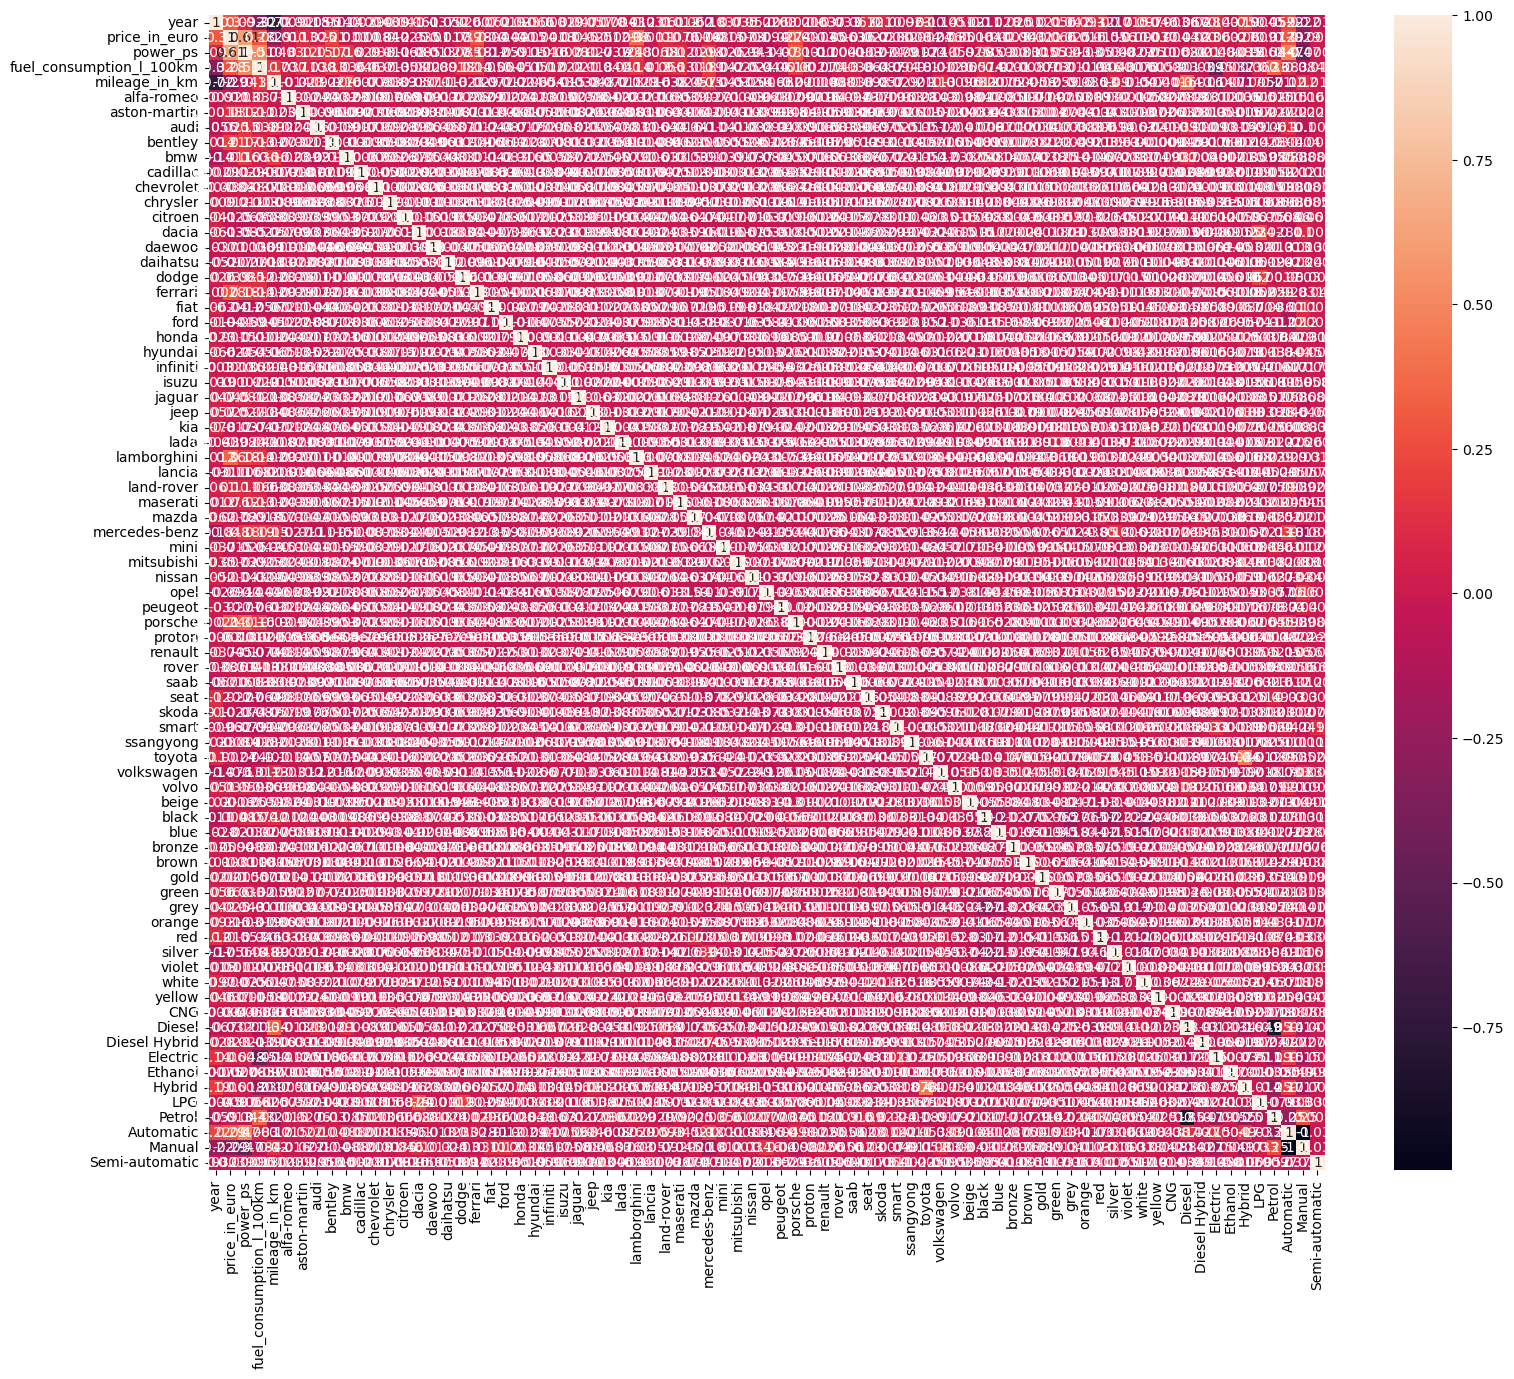

In [239]:
plt.figure(figsize=(18,15))
sns.heatmap(df2.corr(), annot=True)

In [240]:
# only show the 20 most relevant correlations with the price_in_euro
price_corrs = df2.corr()["price_in_euro"].apply(abs).sort_values()
price_corrs[-21:]

mercedes-benz               0.048249
silver                      0.056443
Hybrid                      0.059639
Electric                    0.060379
green                       0.065630
maserati                    0.075549
volkswagen                  0.076446
opel                        0.094396
land-rover                  0.104571
aston-martin                0.125603
bentley                     0.214276
porsche                     0.244031
ferrari                     0.279948
fuel_consumption_l_100km    0.282234
mileage_in_km               0.287825
Automatic                   0.288369
Manual                      0.288677
year                        0.303445
lamborghini                 0.361025
power_ps                    0.610752
price_in_euro               1.000000
Name: price_in_euro, dtype: float64

In [241]:
# only show the 20 most relevant correlations with the price_in_euro
price_corrs = df2.corr()["price_in_euro"].apply(abs).sort_values()
price_corrs[21:]

nissan                      0.010381
cadillac                    0.010686
lancia                      0.010874
bmw                         0.011308
violet                      0.011352
alfa-romeo                  0.011436
chrysler                    0.011801
kia                         0.012336
Petrol                      0.013318
mini                        0.014947
red                         0.015165
saab                        0.015539
orange                      0.016026
daihatsu                    0.017421
blue                        0.019605
gold                        0.020791
seat                        0.021992
skoda                       0.022766
Diesel Hybrid               0.023440
hyundai                     0.024191
grey                        0.024641
jeep                        0.024943
audi                        0.025125
citroen                     0.025224
peugeot                     0.027337
smart                       0.031839
Diesel                      0.032435
d

In [242]:
selected_car_features = price_corrs[-21:].index

In [243]:
selected_car_features = list(selected_car_features)

In [244]:
selected_car_features

['mercedes-benz',
 'silver',
 'Hybrid',
 'Electric',
 'green',
 'maserati',
 'volkswagen',
 'opel',
 'land-rover',
 'aston-martin',
 'bentley',
 'porsche',
 'ferrari',
 'fuel_consumption_l_100km',
 'mileage_in_km',
 'Automatic',
 'Manual',
 'year',
 'lamborghini',
 'power_ps',
 'price_in_euro']

In [245]:
selected_df = df2[selected_car_features]

In [246]:
selected_df

mercedes-benz  silver  Hybrid  Electric  green  maserati  volkswagen  \
0               False   False   False     False  False     False       False   
1               False   False   False     False  False     False       False   
2               False   False   False     False  False     False       False   
3               False   False   False     False  False     False       False   
4               False   False   False     False  False     False       False   
...               ...     ...     ...       ...    ...       ...         ...   
226531          False    True   False     False  False     False       False   
226532          False    True   False     False  False     False       False   
226533          False   False   False     False  False     False       False   
226534          False   False   False     False  False     False       False   
226535          False   False   False      True  False     False       False   

         opel  land-rover  aston-martin  ...  porsche  ferrari  \
0       False       False         False  ...    False    False   
1       False       False         False  ...    False    False   
2       False       False         False  ...    False    False   
3       False       False         False  ...    False    False   
4       False       False         False  ...    False    False   
...       ...         ...           ...  ...      ...      ...   
226531  False       False         False  ...    False    False   
226532  False       False         False  ...    False    False   
226533  False       False         False  ...    False    False   
226534  False       False         False  ...    False    False   
226535  False       False         False  ...    False    False   

        fuel_consumption_l_100km  mileage_in_km  Automatic  Manual  year  \
0                           10.9       160500.0      False    True  1995   
1                            9.5       189500.0      False    True  1995   
2                            7.2        96127.0      False    True  1996   
3                            9.5        47307.0      False    True  1996   
4                            8.8       230000.0      False    True  1996   
...                          ...            ...        ...     ...   ...   
226531                       5.6         5000.0       True   False  2023   
226532                       5.6         5900.0       True   False  2023   
226533                       7.6         4900.0       True   False  2023   
226534                       4.7         1531.0       True   False  2023   
226535                       0.0           50.0       True   False  2023   

        lamborghini  power_ps  price_in_euro  
0             False     201.0         1300.0  
1             False     150.0         4900.0  
2             False     179.0        17950.0  
3             False     150.0         7900.0  
4             False     150.0         3500.0  
...             ...       ...            ...  
226531        False     197.0        55400.0  
226532        False     197.0        54500.0  
226533        False     235.0        89690.0  
226534        False     197.0        61521.0  
226535        False     218.0        52900.0  

[226536 rows x 21 columns]

<Axes: >

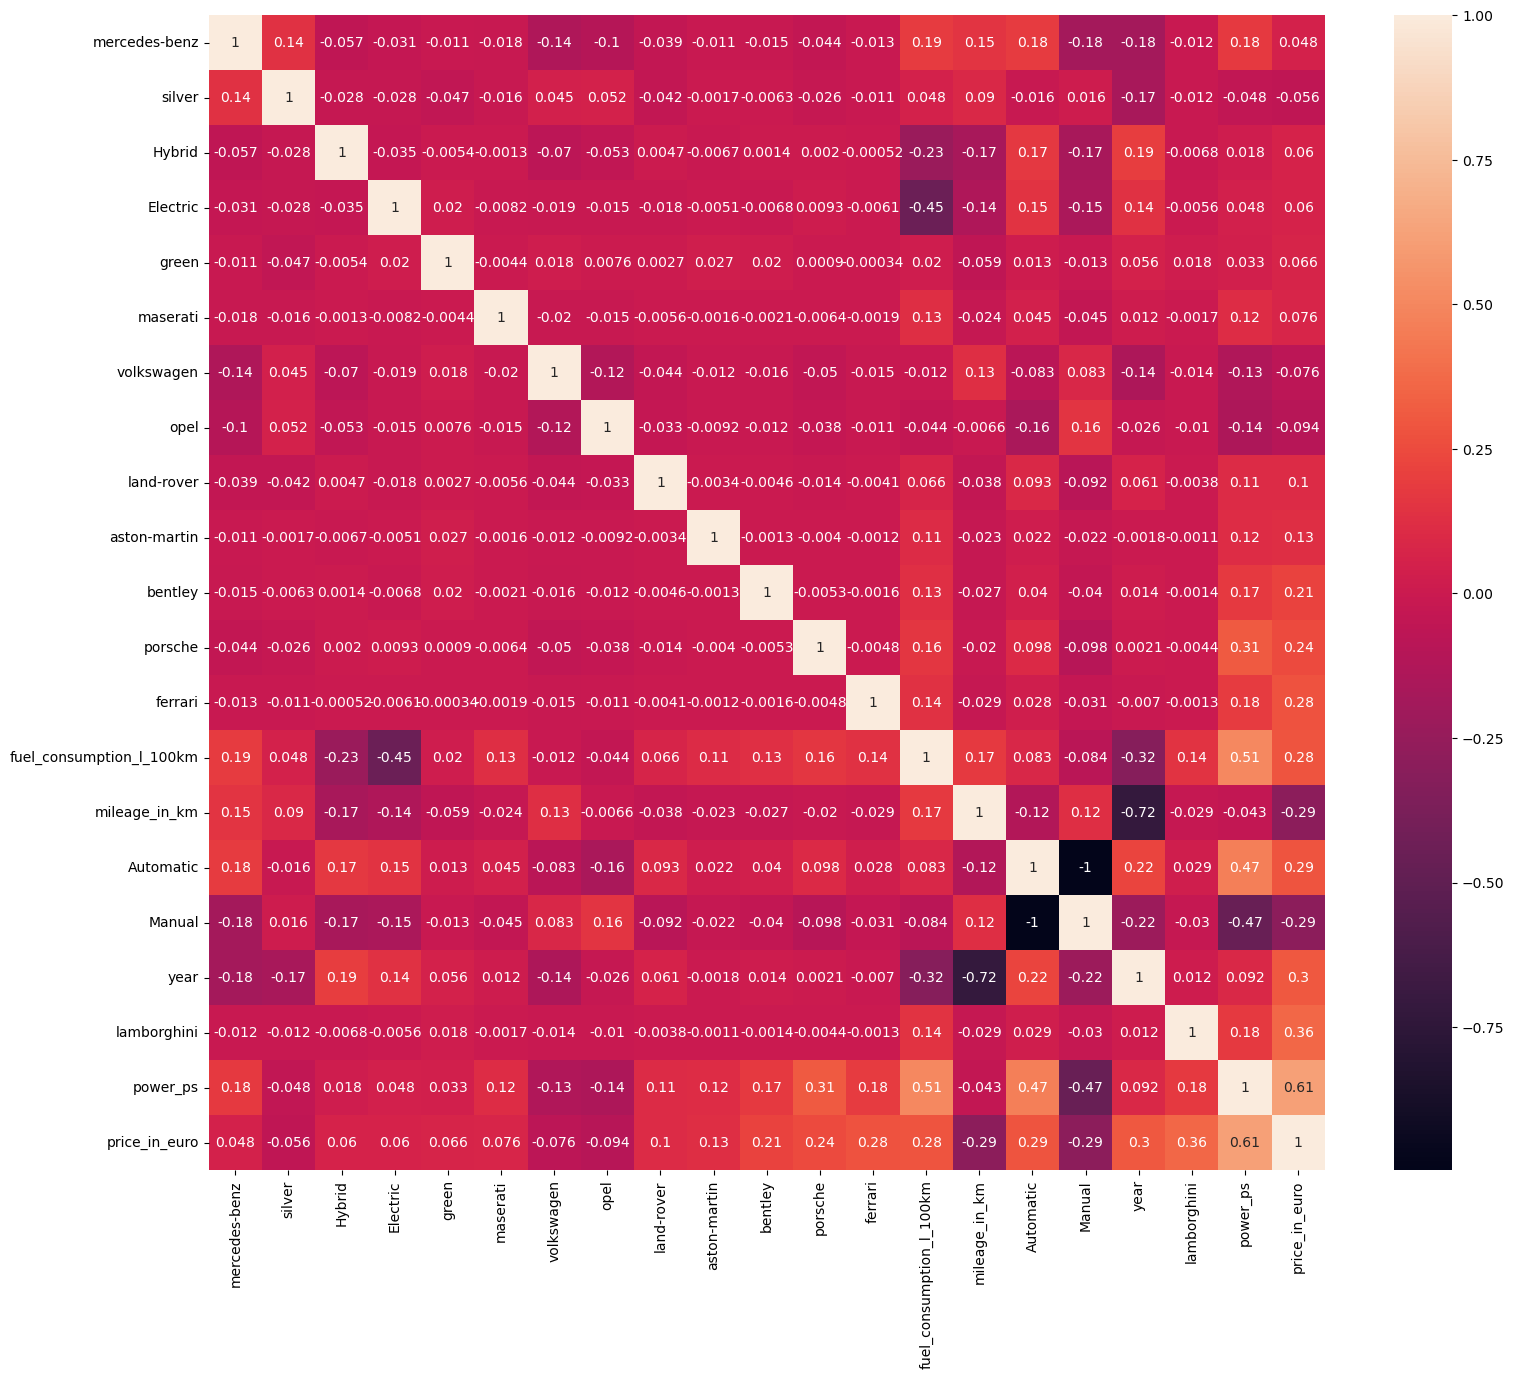

In [248]:
plt.figure(figsize=(18,15))
sns.heatmap(selected_df.corr(), annot=True)

In [249]:
### Scaling data for ML algorithms

In [250]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X, y = selected_df.drop("price_in_euro", axis=1), selected_df["price_in_euro"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#scaling the data because of the very different column values
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [251]:
### Linear Regression

In [252]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [279]:
linear_model.score(X_test_scaled, y_test)

0.6951583440875944

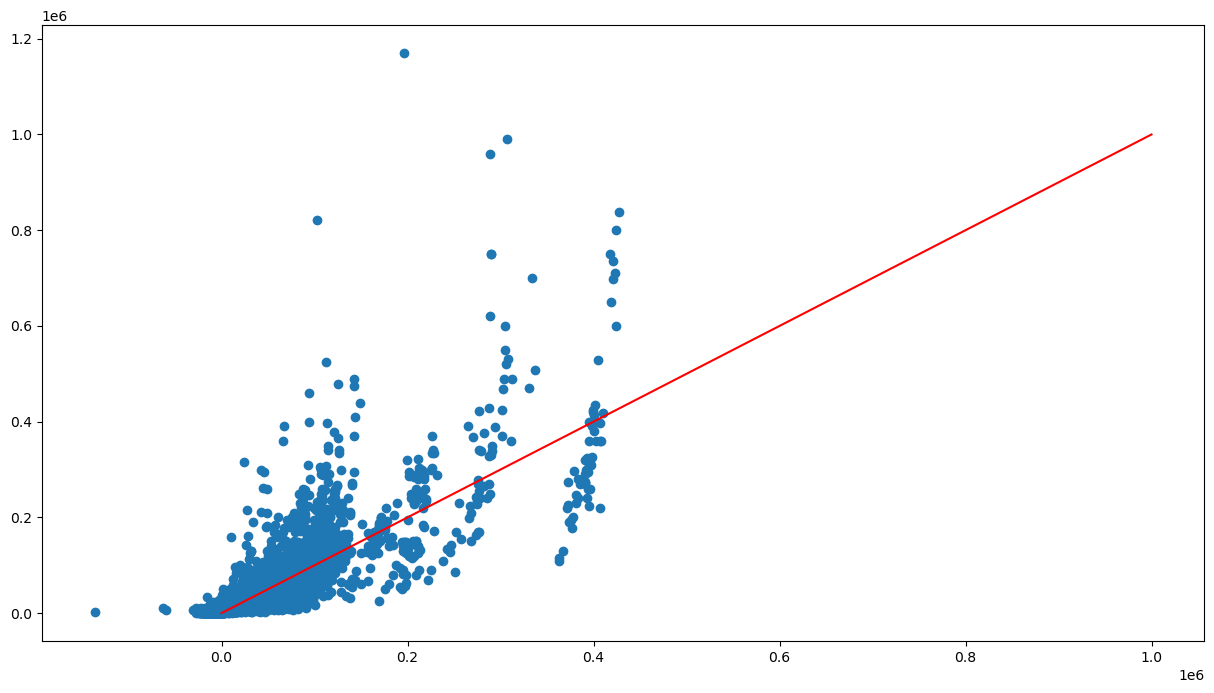

In [254]:
#visualization of the predictions

y_predicted1 = linear_model.predict(X_test_scaled)
plt.figure(figsize=(15,8))
plt.scatter(y_predicted1, y_test)
plt.plot(range(0,1000000),range(0,1000000), c="red" )

In [255]:
X_test.iloc[17]

mercedes-benz                 False
silver                        False
Hybrid                        False
Electric                      False
green                         False
maserati                      False
volkswagen                    False
opel                          False
land-rover                    False
aston-martin                  False
bentley                       False
porsche                       False
ferrari                       False
fuel_consumption_l_100km        4.2
mileage_in_km               29200.0
Automatic                      True
Manual                        False
year                           2021
lamborghini                   False
power_ps                      105.0
Name: 82039, dtype: object

In [256]:
### Random Forest Regression

In [257]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(random_state=42)

forest_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [258]:
forest_model.score(X_test_scaled, y_test)

0.7685729685169018

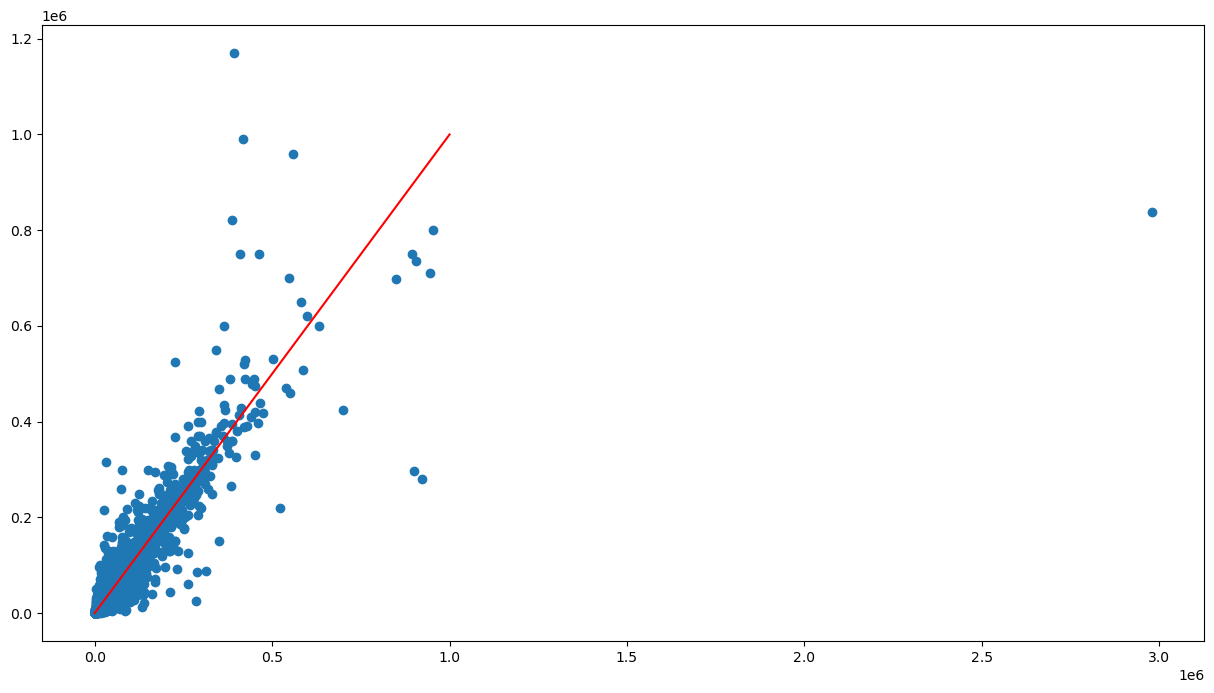

In [259]:
#visualization of the predictions

y_predicted2 = forest_model.predict(X_test_scaled)
plt.figure(figsize=(15,8))
plt.scatter(y_predicted2, y_test)
plt.plot(range(0,1000000),range(0,1000000), c="red" )

In [263]:
#randomly pick a car out of the test data
X_test.iloc[17]

In [146]:
X_test_car = scaler.transform([X_test.iloc[17]])

C:\Users\wurze\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [267]:
# predict this car's value

#linear regression
linear_model.predict(X_test_car)

array([19926.21634303])

In [268]:
#forest
forest_model.predict(X_test_car)

array([26755.86333333])

In [269]:
#knn
knn_model.predict(X_test_car)

array([25470.])

In [270]:
#gbreg
gb_regressor_model.predict(X_test_car)

array([24289.48659694])

In [271]:
#svr
linear_svr_model.predict(X_test_car)

array([21511.89728118])

In [262]:
#actual car's value
y_test.iloc[17]

27990.0

In [149]:
### K nearest neighbors

In [150]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

knn_model = KNeighborsRegressor(n_neighbors=5)  
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [151]:
knn_model.score(X_test_scaled, y_test)

0.8540447436778308

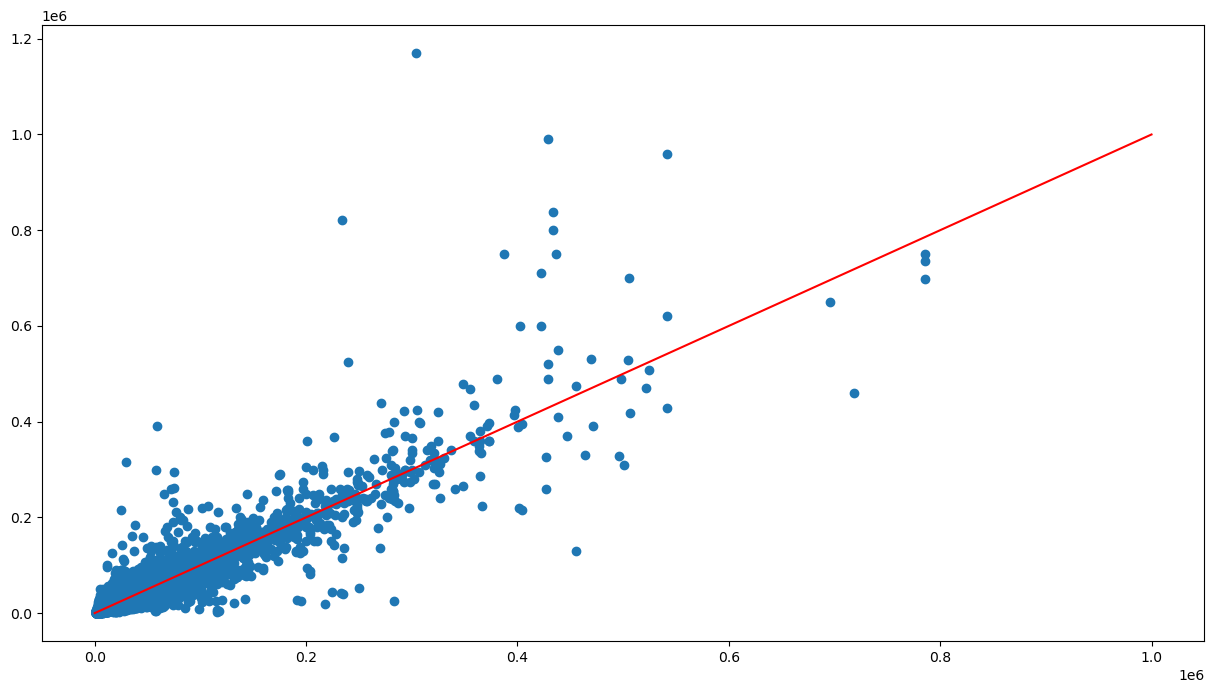

In [152]:
y_predicted3 = knn_model.predict(X_test_scaled)
plt.figure(figsize=(15,8))
plt.scatter(y_predicted3, y_test)
plt.plot(range(0,1000000),range(0,1000000), c="red" )

In [153]:
### Gradient Boosting Regressor

In [154]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_regressor_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=42)

In [155]:
gb_regressor_model.score(X_test_scaled, y_test)

0.8080519719166218

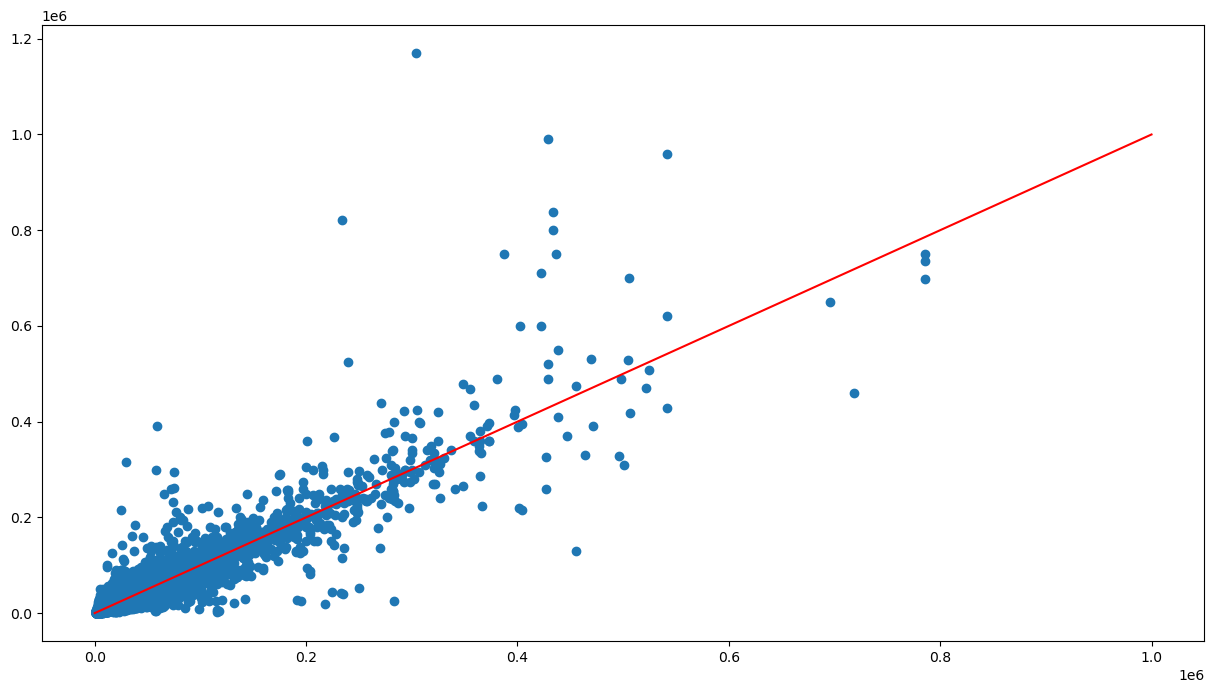

In [156]:
y_predicted4 = knn_model.predict(X_test_scaled)
plt.figure(figsize=(15,8))
plt.scatter(y_predicted4, y_test)
plt.plot(range(0,1000000),range(0,1000000), c="red" )

In [157]:
### Support Vector Regression

In [158]:
from sklearn.svm import LinearSVR

linear_svr_model = LinearSVR(dual=True, random_state=42)
linear_svr_model.fit(X_train_scaled, y_train)

LinearSVR(dual=True, random_state=42)

In [166]:
linear_svr_model.score(X_test_scaled, y_test)

0.5653616634284049

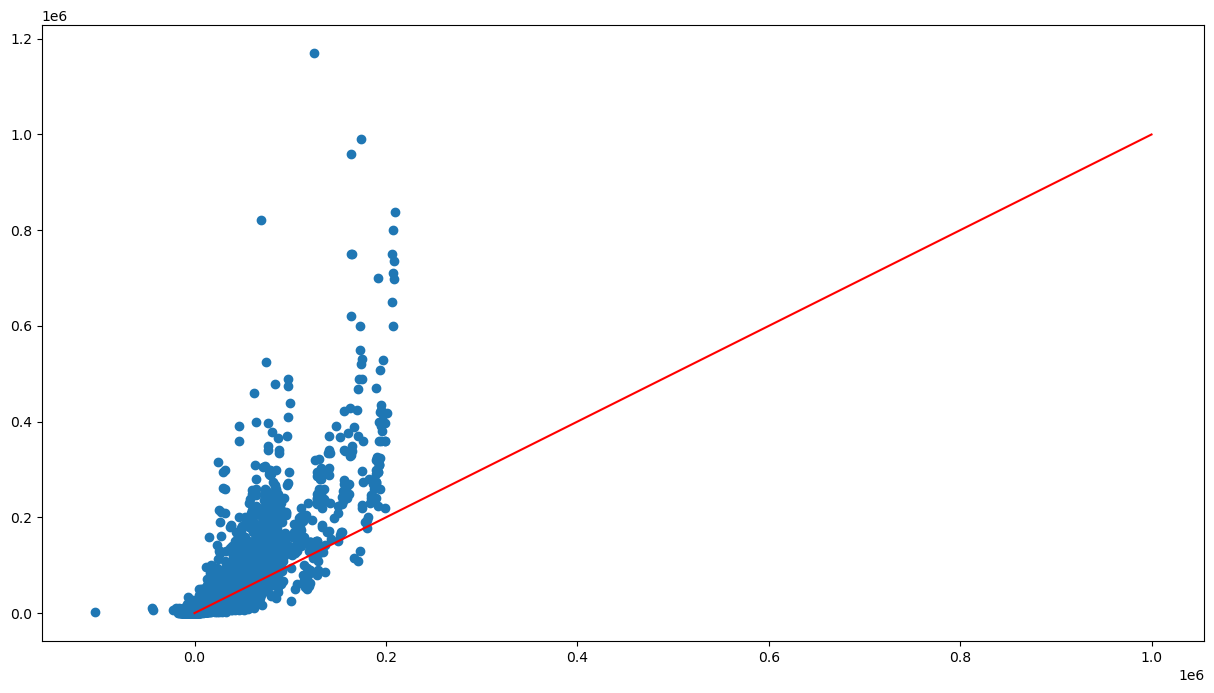

In [160]:
y_predicted5 = linear_svr_model.predict(X_test_scaled)
plt.figure(figsize=(15,8))
plt.scatter(y_predicted5, y_test)
plt.plot(range(0,1000000),range(0,1000000), c="red" )

In [276]:
#create a small subset for mljar automl web application
selected_df_subset = selected_df.sample(n=7900)

# Save the subset to a new CSV file
selected_df_subset.to_csv('germany-used-cars-dataset-2023/subset_data.csv', index=False)

In [277]:
selected_df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7900 entries, 216908 to 203268
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mercedes-benz             7900 non-null   bool   
 1   silver                    7900 non-null   bool   
 2   Hybrid                    7900 non-null   bool   
 3   Electric                  7900 non-null   bool   
 4   green                     7900 non-null   bool   
 5   maserati                  7900 non-null   bool   
 6   volkswagen                7900 non-null   bool   
 7   opel                      7900 non-null   bool   
 8   land-rover                7900 non-null   bool   
 9   aston-martin              7900 non-null   bool   
 10  bentley                   7900 non-null   bool   
 11  porsche                   7900 non-null   bool   
 12  ferrari                   7900 non-null   bool   
 13  fuel_consumption_l_100km  7900 non-null   float64
 14  mileag

In [161]:
# outdated, this was used for the presentation

In [162]:
top_10_expensive = df.nlargest(10, 'price_in_euro')
top_10_expensive

brand                 model  color  year  price_in_euro  \
93699     lamborghini           Lamborghini   grey  2018      5890500.0   
93840     lamborghini           Lamborghini  black  2021      3250000.0   
106583  mercedes-benz     Mercedes-Benz SLR   grey  2007      2490000.0   
165445        porsche           Porsche 918  white  2014      1990000.0   
165783        porsche           Porsche 991  white  2015      1350000.0   
1657     aston-martin  Aston Martin Vantage   blue  2022      1170000.0   
52149         ferrari           Ferrari 599    red  2011      1150000.0   
52218         ferrari           Ferrari 458   blue  2015      1045800.0   
37591             bmw               BMW 550  brown  2018      1010101.0   
5965             audi               Audi Q7  black  2011      1000000.0   

        power_ps transmission_type fuel_type  fuel_consumption_l_100km  \
93699      770.0         Automatic    Petrol                      16.0   
93840      818.0         Automatic    Hybrid                      14.8   
106583     650.0         Automatic    Petrol                      14.5   
165445     886.0         Automatic    Hybrid                       3.1   
165783     430.0         Automatic    Petrol                       8.9   
1657       700.0         Automatic    Petrol                      11.4   
52149      670.0         Automatic    Petrol                      17.5   
52218      605.0         Automatic    Petrol                      13.3   
37591      400.0         Automatic    Diesel                       6.3   
5965       245.0         Automatic    Diesel                       7.4   

        mileage_in_km  
93699            65.0  
93840           177.0  
106583        15793.0  
165445         5125.0  
165783        27000.0  
1657             80.0  
52149          3800.0  
52218          2824.0  
37591         87000.0  
5965         143700.0

In [163]:
# Search for your favourite car brand
selected_brand = 'porsche'

# Filter the DataFrame by the specified brand and then find the cheapest cars
cheapest_cars_selected_brand = df[df['brand'] == selected_brand].nsmallest(5, 'price_in_euro')

# Display the result
cheapest_cars_selected_brand

brand            model  color  year  price_in_euro  power_ps  \
164637  porsche  Porsche Cayenne  black  2006         2500.0     250.0   
164585  porsche  Porsche Cayenne  black  2005         4999.0     450.0   
164553  porsche  Porsche Cayenne  black  2004         5600.0     340.0   
164583  porsche  Porsche Cayenne  black  2005         5990.0     340.0   
164552  porsche  Porsche Cayenne  black  2004         6500.0     250.0   

       transmission_type fuel_type  fuel_consumption_l_100km  mileage_in_km  
164637         Automatic    Petrol                      13.5       280000.0  
164585         Automatic    Petrol                      15.7       198500.0  
164553         Automatic    Petrol                      14.9       224000.0  
164583         Automatic    Petrol                      14.9       225000.0  
164552         Automatic    Petrol                       9.6       260000.0

In [164]:
# Search for your favourite car brand
selected_brand = 'porsche'
#while excluding certain models
excluded_models = ['Cayenne', 'Porsche Cayenne', 'Macan']

# Filter the DataFrame by the specified brand and exclude certain models, then find the cheapest cars
filtered_df = df[(df['brand'] == selected_brand) & (~df['model'].isin(excluded_models))]
cheapest_cars_selected_brand = filtered_df.nsmallest(5, 'price_in_euro')

# Display the result
cheapest_cars_selected_brand

brand            model   color  year  price_in_euro  power_ps  \
164687  porsche      Porsche 911   black  2007         8999.0     355.0   
164673  porsche      Porsche 997   black  2007        11000.0     355.0   
164561  porsche  Porsche Boxster  silver  2004        13900.0     228.0   
164533  porsche  Porsche Boxster  silver  2003        14900.0     260.0   
164865  porsche      Porsche 911   black  2010        17800.0     500.0   

       transmission_type fuel_type  fuel_consumption_l_100km  mileage_in_km  
164687         Automatic    Petrol                      11.7        84400.0  
164673            Manual    Petrol                      11.5        75576.0  
164561            Manual    Petrol                       9.7       281299.0  
164533            Manual    Petrol                      10.5       105000.0  
164865         Automatic    Petrol                      11.5        51100.0